## Before beginning the analysis ,we will load and view the dataset and perform some initial cleaning

* view the dataset info:

**IMPORT NECESSARY LIBRARIES**

In [1]:
# IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

**LOAD THE DATASET**

In [2]:
#LOAD THE DATASET
df=pd.read_excel("LoyaltyVision Analytics.xlsx")

**DATASET OVERVIEW**

In [3]:
#DISPLAY THE FIRST FEW ROWS OF THE DATASET
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [4]:
#DISPLAY LAST FEW ROWS OF THE DATASET
df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


**DATASET DIMENSIONS AND SIZE**

In [5]:
#DISPLAY THE TOTAL NO. OF ROWS IN THE DATASET
len(df)

11260

In [6]:
#DISPLAY THE SHAPE OF THE DATASET i.e. TOTAL NO. OF ROWS AND COLUMNS
df.shape

(11260, 19)

**COLUMNS OVERVIEW**

In [7]:
#DISPLAY THE NAME OF THE ALL COLUMNS IN THE DATASET
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [8]:
#PRINT COLUMNS ACC. TO DATA TYPE
category=df.select_dtypes(['object']).columns
integer=df.select_dtypes(['int64']).columns
float=df.select_dtypes(['float']).columns
print(category)
print(integer)
print(float)

Index(['Tenure', 'Payment', 'Gender', 'Account_user_count', 'account_segment',
       'Marital_Status', 'rev_per_month', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Login_device'],
      dtype='object')
Index(['AccountID', 'Churn'], dtype='object')
Index(['City_Tier', 'CC_Contacted_LY', 'Service_Score', 'CC_Agent_Score',
       'Complain_ly'],
      dtype='object')


#### There are some columns which has numeric data type but here shows object data type, So, Lets first change the data type of such columns 

In [9]:
#correct data types of numerical columns
for col in ['Tenure', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
#DISPLAY ALL THE BASIC NUMERICAL TERMS FOR ALL NUMERICAL COLUMNS
df.describe()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.00000,11260.000000,11042.000000,11148.000000,11158.000000,11162.000000,10816.000000,11144.000000,10469.000000,10903.000000,11257.000000,11257.000000,10902.000000,10787.000000
mean,25629.50000,0.168384,11.025086,1.653929,17.867091,2.902526,3.692862,3.066493,6.362594,0.285334,16.193391,1.790619,4.633187,196.236370
std,3250.62635,0.374223,12.879782,0.915015,8.853269,0.725584,1.022976,1.379772,11.909686,0.451594,3.757721,1.969551,3.697637,178.660514
min,20000.00000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,22814.75000,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.210000
50%,25629.50000,0.000000,9.000000,1.000000,16.000000,3.000000,4.000000,3.000000,5.000000,0.000000,15.000000,1.000000,3.000000,165.250000
75%,28444.25000,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,8.000000,200.010000
max,31259.00000,1.000000,99.000000,3.000000,132.000000,5.000000,6.000000,5.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1997.000000


In [11]:
#DISPLAY ALL COLUMN NAMES WITH TOTAL NO. OF NON-NULL VALUES AND DATATYPE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

**Data Cleaning:**

In [12]:
## DATA CLEANING
#CHECKING DUPLICATE LINE
duplicate = df.duplicated().any()
duplicate

False

* Lets check are there any null values or outliers
   *     Null Values 

In [13]:
#display FALSE for all NOT NULL values and TRUE for all NULL values in the given dataset
df.isnull()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11256,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11257,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11258,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#display if the column has any null value or not
df.isnull().any()

AccountID                  False
Churn                      False
Tenure                      True
City_Tier                   True
CC_Contacted_LY             True
Payment                     True
Gender                      True
Service_Score               True
Account_user_count          True
account_segment             True
CC_Agent_Score              True
Marital_Status              True
rev_per_month               True
Complain_ly                 True
rev_growth_yoy              True
coupon_used_for_payment     True
Day_Since_CC_connect        True
cashback                    True
Login_device                True
dtype: bool

In [15]:
#display total no. of null values for each column
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               221
dtype: int64

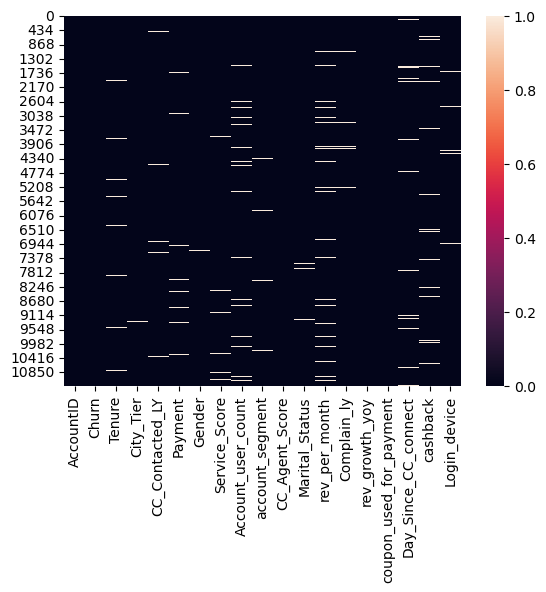

In [16]:
sns.heatmap(df.isnull())
plt.show()

**Except 'Account_ID' and 'Churn' all columns contain null values**

**Here we can see that both numerical and categorical columns have null values.**
* we will fill all the null values of numeric columns with MEAN of respective column.
* we will fill all the null values of categorical column with MODE of respective column. 

In [17]:
#handling missing values
#fill all null values of numerical column with mean of respective column
num_cols=['Tenure','CC_Contacted_LY','rev_per_month','rev_growth_yoy','Day_Since_CC_connect','cashback']
for col in num_cols:
    df[col].fillna(df[col].mean(),inplace=True)
cat_cols=['Payment','Gender','Service_Score','City_Tier','CC_Agent_Score','Account_user_count','account_segment','Marital_Status','Complain_ly','coupon_used_for_payment','Login_device']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [18]:
#print no. of null values
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

**Outlier detection and treatment:**

In [19]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df,column):
    Q1 = df[column].quantile(0.25) # First Quartile (25th percentile)
    Q3 = df[column].quantile(0.75) # Third Quartile (75th percentile)
    IQR = Q3 - Q1 # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR # Lower bound
    upper_bound = Q3 + 1.5 * IQR # Upper bound
    # Finding outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    return outliers
outliers = detect_outliers_iqr(df,"CC_Contacted_LY")
print("Outliers in CC_Contacted_LY:",outliers)

Outliers in CC_Contacted_LY: 42


In [20]:
# Function to cap outliers within the IQR range
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
cap_outliers(df,"CC_Contacted_LY")
outliers1 = detect_outliers_iqr(df,"CC_Contacted_LY")
print("Outliers in CC_Contacted_LY:",outliers1)

Outliers in CC_Contacted_LY: 0


## Exploratory Data Analysis

**Univariate Analysis:**

Churn
0    9364
1    1896
Name: count, dtype: int64


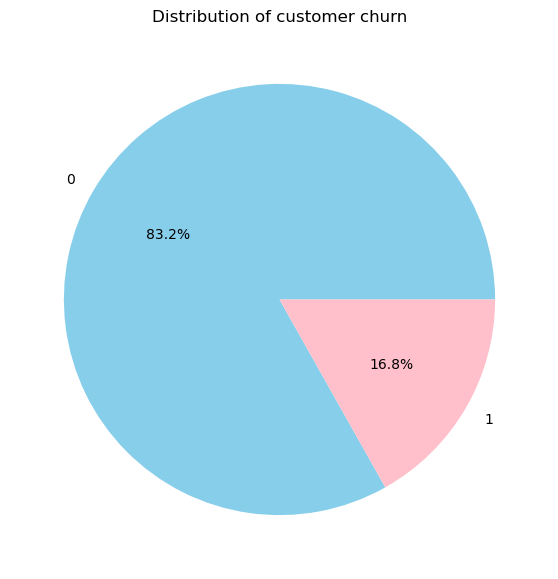

In [21]:
# churn distribution
churn_counts = df["Churn"].value_counts()
print(churn_counts)
# Pie chart for churn distribution
plt.figure(figsize=(7, 7))
plt.pie(churn_counts, labels=churn_counts.index, autopct="%1.1f%%", colors=["skyblue","pink"])
plt.title("Distribution of customer churn")
plt.show()

* on the basis of distribution of "Churn" column we can say that 16.8% customers do churn and 83.2% customers do not churn 

Tenure
1.000000     1351
0.000000     1231
8.000000      519
9.000000      496
7.000000      450
10.000000     423
3.000000      410
5.000000      403
4.000000      403
11.000000     388
6.000000      363
12.000000     360
13.000000     359
2.000000      354
14.000000     345
15.000000     311
16.000000     291
19.000000     273
18.000000     253
11.025086     218
20.000000     217
17.000000     215
21.000000     170
23.000000     169
22.000000     151
24.000000     147
28.000000     137
30.000000     137
27.000000     131
99.000000     131
26.000000     122
25.000000     114
29.000000     114
31.000000      96
50.000000       2
60.000000       2
51.000000       2
61.000000       2
Name: count, dtype: int64


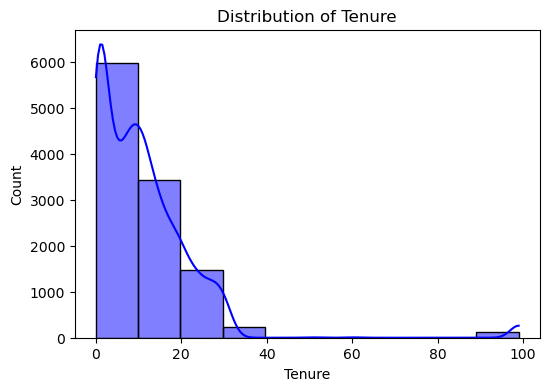

In [22]:
# Tenure distribution
tenure_counts = df["Tenure"].value_counts()
print(tenure_counts)
plt.figure(figsize=(6, 4))
sns.histplot(df['Tenure'], bins=10, kde=True, color="blue")
plt.title("Distribution of Tenure")
plt.show()

City_Tier
1.0    7375
3.0    3405
2.0     480
Name: count, dtype: int64


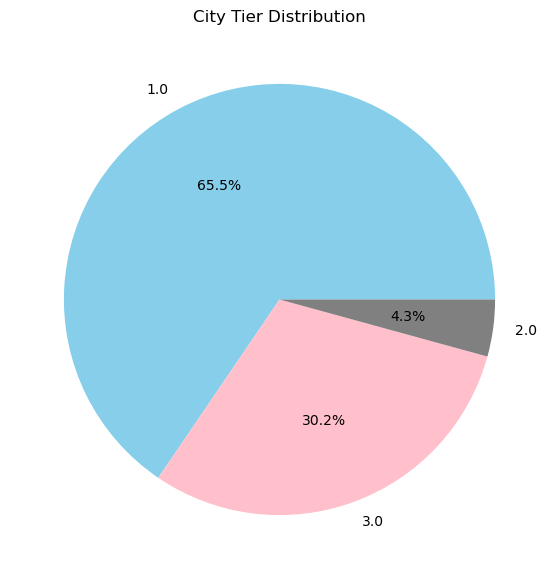

In [23]:
# City_Tier distribution
city_tier_counts = df["City_Tier"].value_counts()
print(city_tier_counts)
# Pie chart city tier distribution
plt.figure(figsize=(7, 7))
plt.pie(city_tier_counts,labels=city_tier_counts.index, autopct="%1.1f%%",colors=["skyblue","pink","grey"])
plt.title("City Tier Distribution")
plt.show()

* on the basis of city tier distribution we can say that :
   * 65.5% customers belongs to tier 1 city
   * 30.2% customers belongs to tier 2 city
   * 4.3% customers belongs to tier 3 city 

CC_Contacted_LY
14.000000    682
16.000000    663
9.000000     655
13.000000    655
15.000000    623
12.000000    571
8.000000     538
17.000000    525
11.000000    524
10.000000    489
7.000000     391
18.000000    374
19.000000    364
20.000000    319
6.000000     311
21.000000    310
22.000000    282
23.000000    241
24.000000    214
25.000000    197
32.000000    192
29.000000    181
34.000000    178
28.000000    178
30.000000    175
27.000000    174
26.000000    169
35.000000    165
31.000000    165
33.000000    155
36.000000    148
17.867091    102
37.000000     96
38.000000     73
41.000000     71
39.000000     55
40.000000     46
5.000000       8
4.000000       1
Name: count, dtype: int64


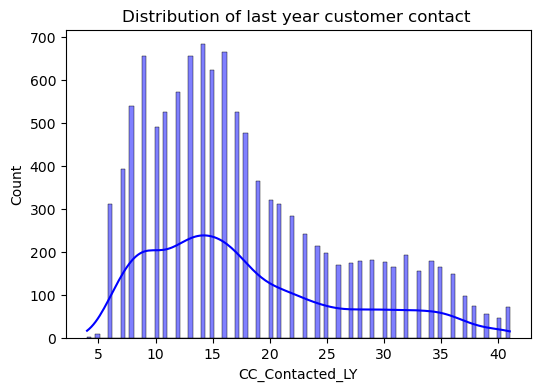

In [24]:
#Distribution of last year customer contact
CCC_LY_counts = df["CC_Contacted_LY"].value_counts()
print(CCC_LY_counts)
plt.figure(figsize=(6, 4))
sns.histplot(df['CC_Contacted_LY'],bins=100,kde=True, color="blue")
plt.title("Distribution of last year customer contact ")
plt.show()

* On the basis of the "CC_Contacted_LY" we can say that :
    * Very few customers complained 4-5 times.
    * a very big no. of customers comlained 5-20 times.
    * ther are also a good no. of customers who complained 20-40 times       

Payment
Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: count, dtype: int64


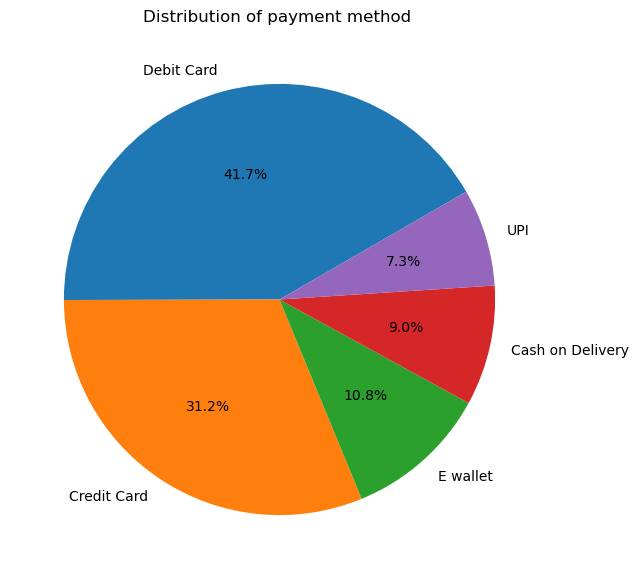

In [25]:
# payment method distribution
payment_counts = df["Payment"].value_counts()
print(payment_counts)
# Pie chart for payment distribution
plt.figure(figsize=(7, 7))
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", startangle=30)
plt.title("Distribution of payment method ")
plt.show()

* On the basis of distribution of colunn "Payment", we can say that: 
   * 41.7% uses debit card,
   *  31.2% uses credit card,
   *  10.8% uses E wallet,
   *  9.0% uses cash on delivery,
   *  7.3% uses UPI  


Gender
Male      6812
Female    4448
Name: count, dtype: int64


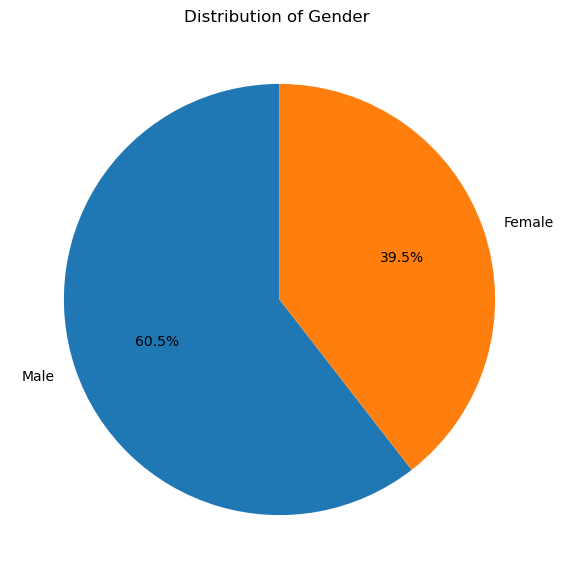

In [26]:
# gender distribution
df['Gender'] = df['Gender'].replace({'F': 'Female', 'M': 'Male'})
gender_counts = df["Gender"].value_counts()
print(gender_counts)
# Pie chart for gender distribution
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Gender ")
plt.show()

* on the basis of the "Gender" column ,we can say that: 
   * 60.5% are male customers
   * 39.5% are female customers   


Service_Score
0.0       8
1.0      77
2.0    3251
3.0    5588
4.0    2331
5.0       5
Name: count, dtype: int64


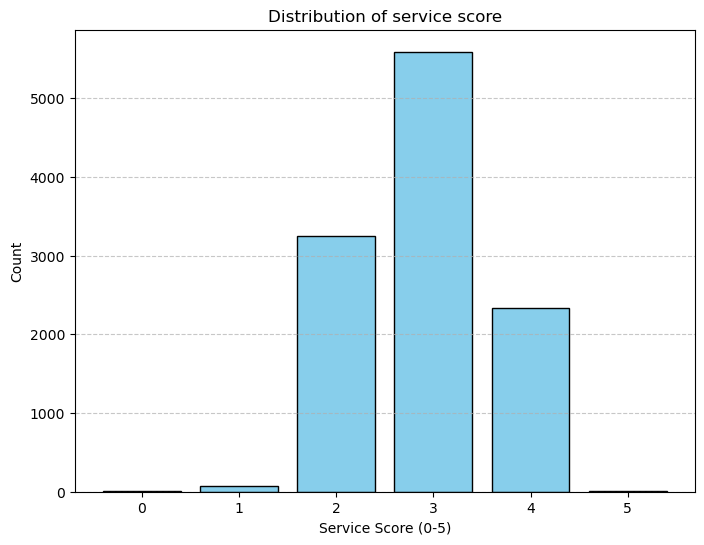

In [27]:
# service score distribution
SS_counts = df["Service_Score"].value_counts().sort_index()
print(SS_counts)
# bar chart for Service Score distribution
plt.figure(figsize=(8, 6))
plt.bar(SS_counts.index, SS_counts.values, color='skyblue', edgecolor='black')
# Labels and title
plt.xlabel("Service Score (0-5)")
plt.ylabel("Count")
plt.title("Distribution of service score")
plt.xticks(range(6)) # Ensure x-axis has 0 to 5 labels
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines for better readability
# Show plot
plt.show()

* on the basis of the "Service_Score" column,we can say that:
   * most of the customers gave 3 service score,
   * then 2 score and then 4 score


Account_user_count
4.0    5013
3.0    3261
5.0    1699
2.0     526
1.0     446
6.0     315
Name: count, dtype: int64


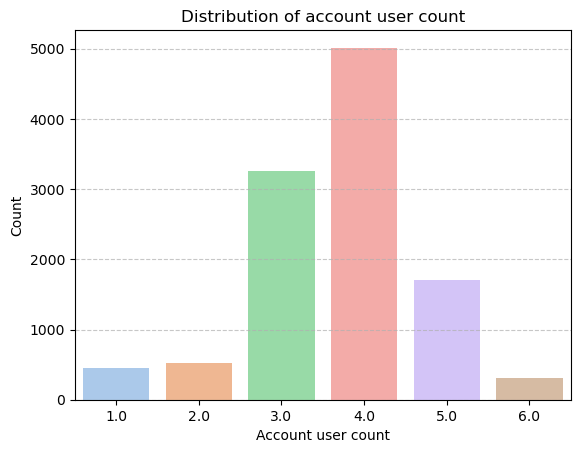

In [28]:
# account user count distribution(how many numbers of customers tagged with this account)
AU_counts = df["Account_user_count"].value_counts()
print(AU_counts)
sns.barplot(x=AU_counts.index,y= AU_counts.values, palette='pastel')
# Labels and title
plt.xlabel("Account user count")
plt.ylabel("Count")
plt.title("Distribution of account user count")
plt.xticks(range(6)) # Ensure x-axis has 0 to 5 labels
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines for better readability
# Show plot
plt.show()

* on the basis of the "Account_user_count" column,we can say that:
   * decreasing order of user count :4>3>5>2>1>6

account_segment
Super           4159
Regular Plus    4124
HNI             1639
Super Plus       818
Regular          520
Name: count, dtype: int64


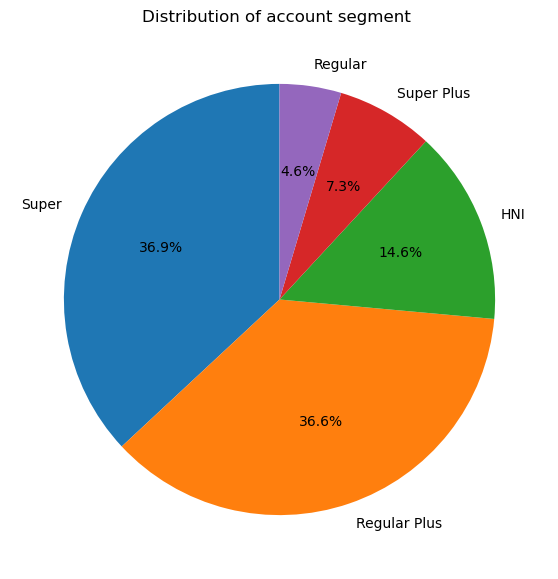

In [29]:
#Distribution of account segment
df['account_segment'] = df['account_segment'].replace({'Regular +': 'Regular Plus','Super +':'Super Plus'})
AS_counts = df["account_segment"].value_counts()
print(AS_counts)
# Pie chart for account segment distribution
plt.figure(figsize=(7, 7))
plt.pie(AS_counts, labels=AS_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of account segment ")
plt.show()

* On the basis of the "account_segment" column,we can say that:
   * HNI-14.6%
   * Regular-4.6%
   * Regular Plus-36.6%
   * Super-36.9%
   * Super Plus-7.3%
* only 7.3% customers spend more money
* most of the customers spend average money
* few customers spend less money   

CC_Agent_Score
3.0    3476
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: count, dtype: int64


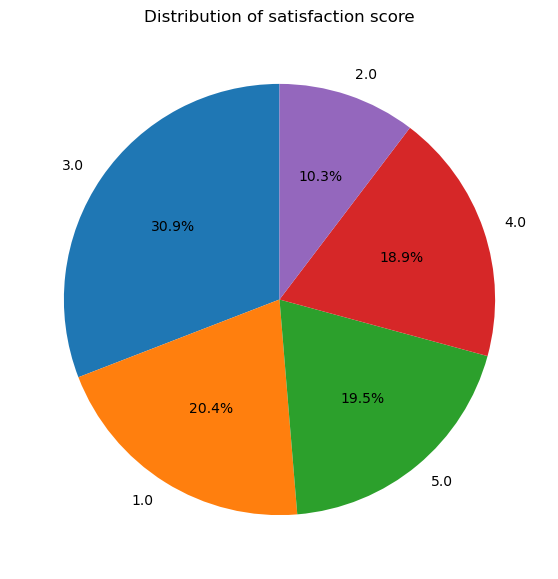

In [30]:
#"Distribution of satisfaction score on customer care services"
cc_counts = df["CC_Agent_Score"].value_counts()
print(cc_counts)
# Pie chart for account segment distribution
plt.figure(figsize=(7, 7))
plt.pie(cc_counts, labels=cc_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of satisfaction score")
plt.show()

* on the basis of the "CC_Agent_Score" column ,we can say that:
   * almost one-third customers gave 3 rating i.e. average satisfaction,
   * almost one-third customers gave 4 or 5 rating i.e. highly satisfied,
   *  almost one-third customers gave 1 or 2 rating i.e. very low satisfaction


Marital_Status
Married     6072
Single      3520
Divorced    1668
Name: count, dtype: int64


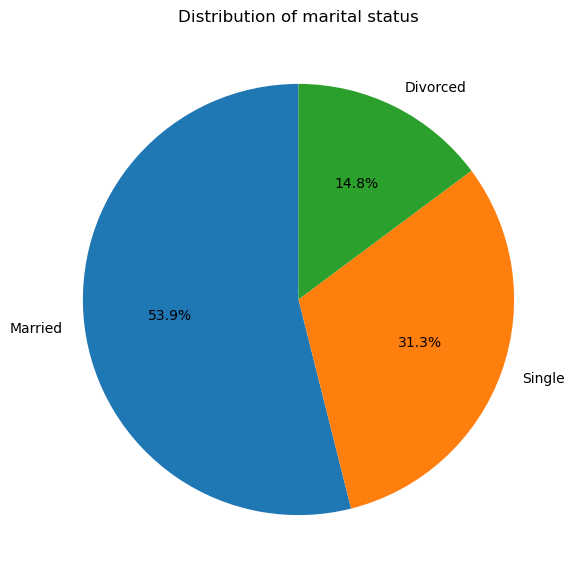

In [31]:
#Distribution of marital status
MS_counts = df["Marital_Status"].value_counts()
print(MS_counts)
# Pie chart for marital status
plt.figure(figsize=(7, 7))
plt.pie(MS_counts, labels=MS_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of marital status")
plt.show()

* on the bais of the "Marital_Status" column ,we can say that:
   * almost one half of the customers are married and another one half of the customers are either single or divorced  
 

rev_per_month
3.000000      1746
2.000000      1585
5.000000      1337
4.000000      1218
6.000000      1085
6.362594       791
7.000000       754
8.000000       643
9.000000       564
10.000000      413
1.000000       402
11.000000      278
12.000000      166
13.000000       93
14.000000       48
15.000000       24
102.000000       8
123.000000       5
124.000000       5
107.000000       5
136.000000       4
140.000000       4
118.000000       4
133.000000       4
129.000000       4
115.000000       3
117.000000       3
138.000000       3
101.000000       3
110.000000       3
137.000000       3
119.000000       3
108.000000       3
127.000000       3
116.000000       3
126.000000       3
130.000000       3
113.000000       3
120.000000       2
19.000000        2
131.000000       2
139.000000       2
114.000000       2
125.000000       2
22.000000        2
121.000000       2
105.000000       2
134.000000       2
20.000000        1
23.000000        1
122.000000       1
21.000000        

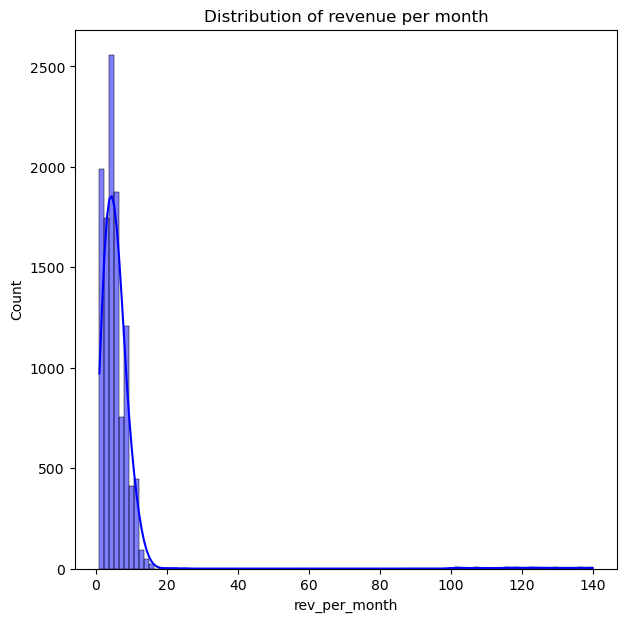

In [32]:
#Distribution of revenue per month
rpm_counts = df["rev_per_month"].value_counts()
print(rpm_counts)
# Pie chart for account segme
plt.figure(figsize=(7, 7))
sns.histplot(df['rev_per_month'],bins=100,kde=True, color="blue")
plt.title("Distribution of revenue per month")
plt.show()

Complain_ly
0.0    8149
1.0    3111
Name: count, dtype: int64


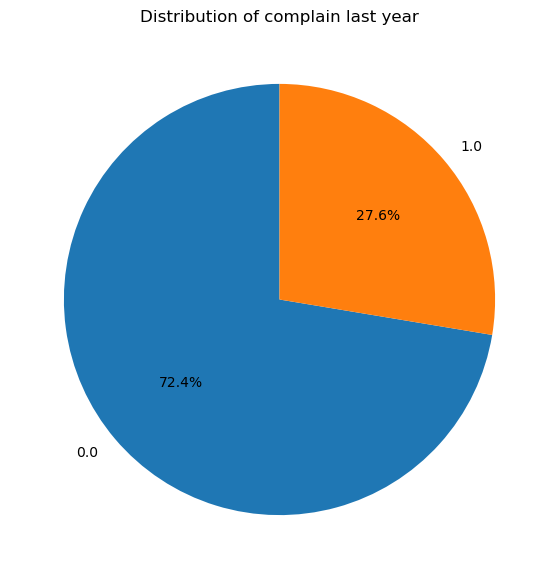

In [33]:
#Distribution of complain last year
cly_counts = df["Complain_ly"].value_counts()
print(cly_counts)
# Pie chart for marital status
plt.figure(figsize=(7, 7))
plt.pie(cly_counts, labels=cly_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of complain last year")
plt.show()

* on the basis of the "Complain_LY" we can say that:
   * 27.6% customers do complain
   * and 72.4% customers do not complain

rev_growth_yoy
14.000000    1524
13.000000    1427
15.000000    1283
12.000000    1210
16.000000     949
18.000000     708
17.000000     704
19.000000     619
20.000000     562
11.000000     523
21.000000     433
22.000000     403
23.000000     345
24.000000     229
25.000000     188
26.000000      98
27.000000      35
28.000000      14
16.193391       3
4.000000        3
Name: count, dtype: int64


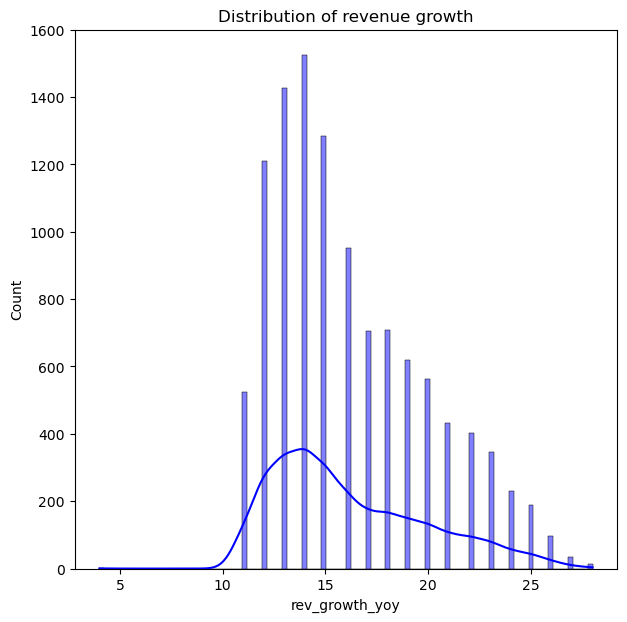

In [34]:
#Distribution of revenue growth
rev_growth_counts = df["rev_growth_yoy"].value_counts()
print(rev_growth_counts)
# chart for revenue growth
plt.figure(figsize=(7, 7))
sns.histplot(df['rev_growth_yoy'],bins=100,kde=True, color="blue")
plt.title("Distribution of revenue growth")
plt.show()

* On the basis of the "rev_growth_yoy" column ,we can say that:
   * Average revenue growth is around 13-14%
   * very few customers show growth above 25% ,suggesting that high revenue growth is rare


coupon_used_for_payment
1.0     4376
2.0     2656
0.0     2150
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
9.0       34
10.0      34
11.0      30
12.0      26
13.0      22
14.0      12
15.0       4
16.0       4
Name: count, dtype: int64


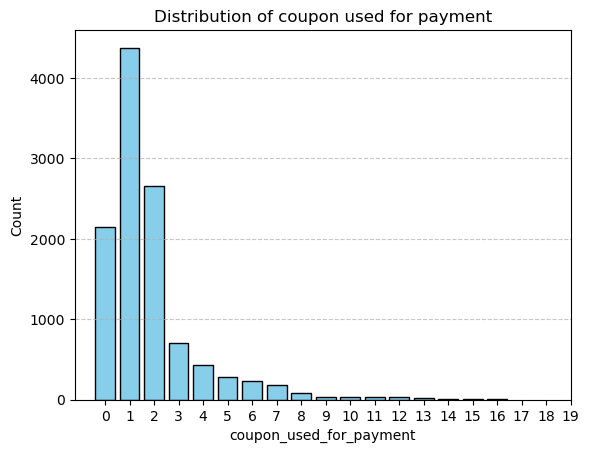

In [35]:
#Distribution of coupon used for payment
coupon_counts = df["coupon_used_for_payment"].value_counts()
print(coupon_counts)
# chart for coupon used for payment
plt.bar(coupon_counts.index, coupon_counts.values, color='skyblue', edgecolor='black')
# Labels and title
plt.xlabel("coupon_used_for_payment")
plt.ylabel("Count")
plt.title("Distribution of coupon used for payment")
plt.xticks(range(20)) # Ensure x-axis has 0 to 5 labels
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid lines for better readability
# Show plot
plt.show()

* on the basis of the "coupon_used_for_payment" column,we can say that
   * most customers use 1 coupon
   * some customers don't use any coupons
   * usage drops sharply after 2 coupons
   * very few customers use more than 6 coupons  

Day_Since_CC_connect
3.000000     1816
2.000000     1574
1.000000     1256
8.000000     1169
0.000000      964
7.000000      911
4.000000      893
9.000000      622
5.000000      479
4.633187      358
10.000000     339
6.000000      229
11.000000     183
12.000000     146
13.000000     117
14.000000      74
15.000000      37
17.000000      34
16.000000      26
18.000000      26
30.000000       2
31.000000       2
47.000000       2
46.000000       1
Name: count, dtype: int64


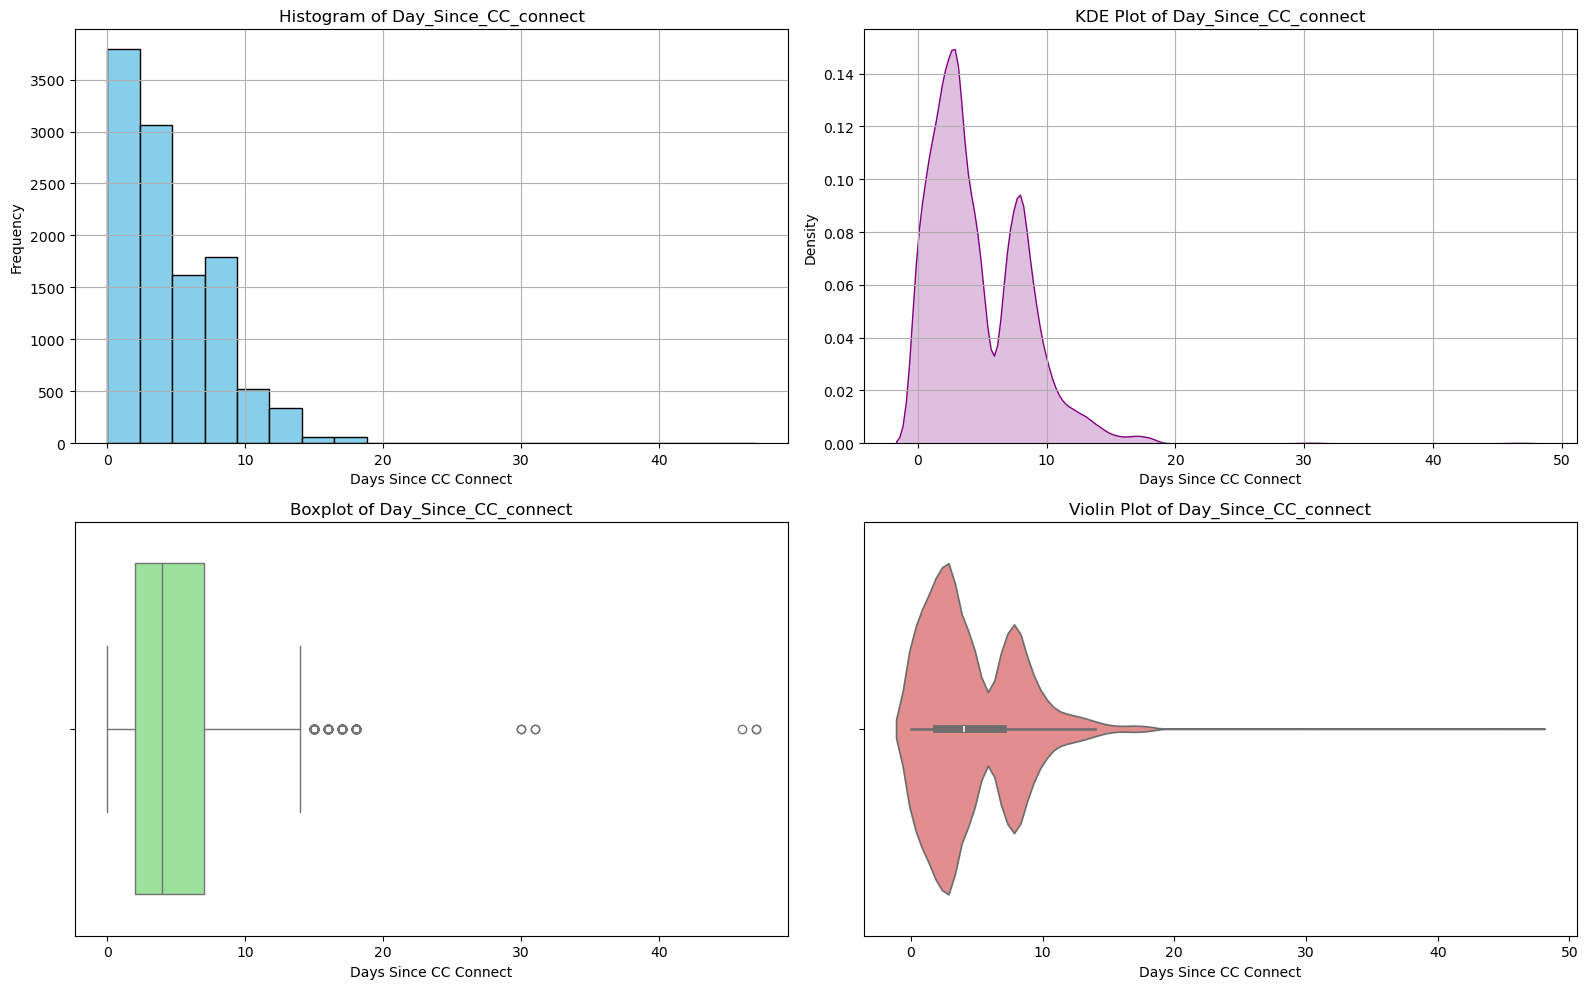

In [36]:
#Distribution of Days Since CC Connect
cc_connect_counts = df["Day_Since_CC_connect"].value_counts()
print(cc_connect_counts)
plt.figure(figsize=(16,10))
# Histogram
plt.subplot(2, 2, 1)
plt.hist(df['Day_Since_CC_connect'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Day_Since_CC_connect')
plt.xlabel('Days Since CC Connect')
plt.ylabel('Frequency')
plt.grid(True)
# KDE Plot
plt.subplot(2, 2, 2)
sns.kdeplot(df['Day_Since_CC_connect'], fill=True, color='purple')
plt.title('KDE Plot of Day_Since_CC_connect')
plt.xlabel('Days Since CC Connect')
plt.ylabel('Density')
plt.grid(True)
# Boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Day_Since_CC_connect'], color='lightgreen')
plt.title('Boxplot of Day_Since_CC_connect')
plt.xlabel('Days Since CC Connect')
# Violin Plot
plt.subplot(2, 2, 4)
sns.violinplot(x=df['Day_Since_CC_connect'], color='lightcoral')
plt.title('Violin Plot of Day_Since_CC_connect')
plt.xlabel('Days Since CC Connect')
plt.tight_layout()
plt.show()

* on the basis of the "Day_Since_CC_Connect" column,we can say that:
   * most customers contacted within 0 to 10 days, with peaks around 0,1 and 7
   * very few customers contacted after 20+ days
   * recent interactions are much more common  

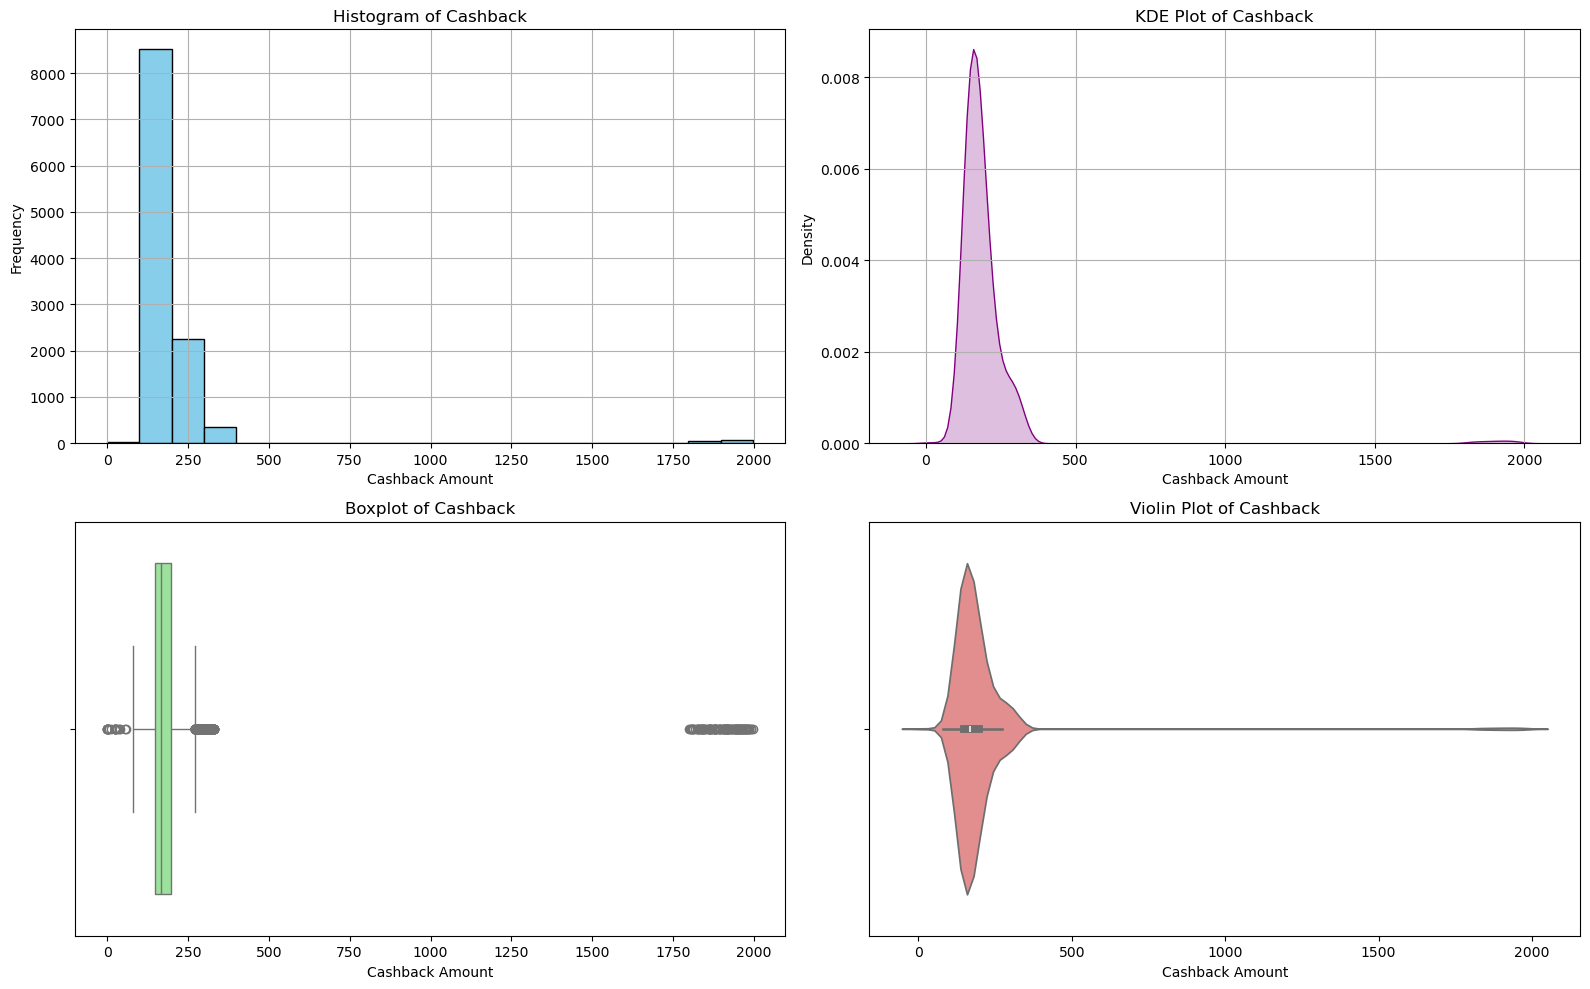

In [37]:
#distribution of cashback
plt.figure(figsize=(16,10))
# Histogram
plt.subplot(2, 2, 1)
plt.hist(df['cashback'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Cashback')
plt.xlabel('Cashback Amount')
plt.ylabel('Frequency')
plt.grid(True)
# KDE Plot
plt.subplot(2, 2, 2)
sns.kdeplot(df['cashback'], fill=True, color='purple')
plt.title('KDE Plot of Cashback')
plt.xlabel('Cashback Amount')
plt.ylabel('Density')
plt.grid(True)
# Boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x=df['cashback'], color='lightgreen')
plt.title('Boxplot of Cashback')
plt.xlabel('Cashback Amount')
# Violin Plot
plt.subplot(2, 2, 4)
sns.violinplot(x=df['cashback'], color='lightcoral')
plt.title('Violin Plot of Cashback')
plt.xlabel('Cashback Amount')
plt.tight_layout()


* on the basis of the "cashback" column,we can say that:
   * average yearly cashback for most of the customers lie between 0 to 250
   * there are very few cases where cashback goes above 400 and almost none beyond 2000 

Login_device
Mobile      7703
Computer    3018
other        539
Name: count, dtype: int64


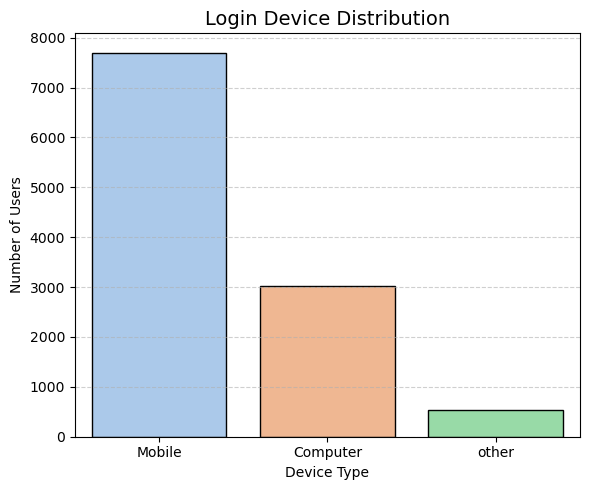

In [38]:
#distribution of login device
df['Login_device'] = df['Login_device'].replace({'&&&&': 'other'})
LD_counts = df["Login_device"].value_counts()
print(LD_counts)
# Value counts
device_counts = df['Login_device'].value_counts()
# Plot
plt.figure(figsize=(6,5))
sns.barplot(x=device_counts.index, y=device_counts.values, palette='pastel', edgecolor='black')
# Labels
plt.title('Login Device Distribution', fontsize=14)
plt.xlabel('Device Type')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* on the basis of the "login_device" column ,we can say that:
    * almost 70% customers preffered Mobile as login decvice.

**Bivariate Analysis**

* Churn vs Gender

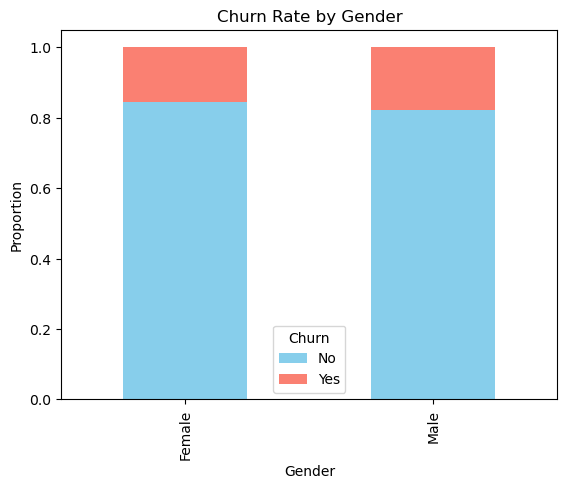

In [39]:
churn_gender = pd.crosstab(df['Gender'], df['Churn'])
# Normalize to get percentage
churn_gender_norm = churn_gender.div(churn_gender.sum(1), axis=0)
churn_gender_norm.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Churn Rate by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.legend(['No', 'Yes'], title='Churn')
plt.show()

* Churn vs Login Device

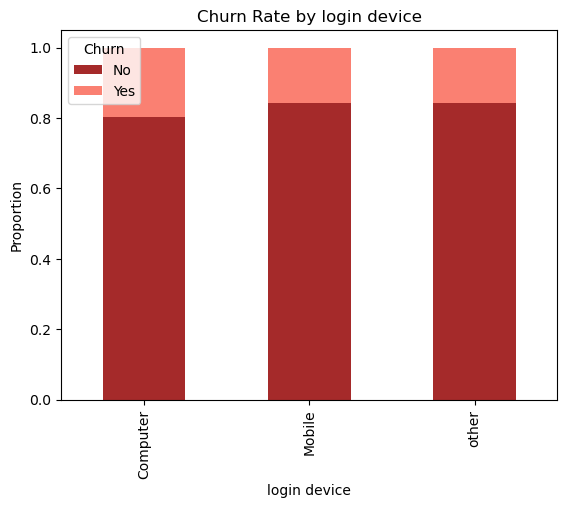

In [40]:
churn_logdev = pd.crosstab(df['Login_device'], df['Churn'])
# Normalize to get percentage
churn_logdev_norm = churn_logdev.div(churn_logdev.sum(1), axis=0)
churn_logdev_norm.plot(kind='bar', stacked=True, color=['brown', 'salmon'])
plt.title('Churn Rate by login device')
plt.ylabel('Proportion')
plt.xlabel('login device')
plt.legend(['No', 'Yes'], title='Churn')
plt.show()

* Churn vs City Tier

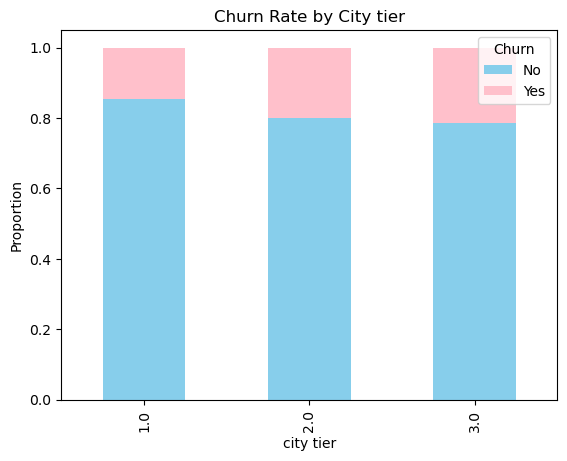

In [41]:
churn_CT = pd.crosstab(df['City_Tier'], df['Churn'])
# Normalize to get percentage
churn_CT_norm = churn_CT.div(churn_CT.sum(1), axis=0)
churn_CT_norm.plot(kind='bar', stacked=True, color=['skyblue', 'pink'])
plt.title('Churn Rate by City tier')
plt.ylabel('Proportion')
plt.xlabel('city tier')
plt.legend(['No', 'Yes'], title='Churn')
plt.show()

* Churn vs Account Segment

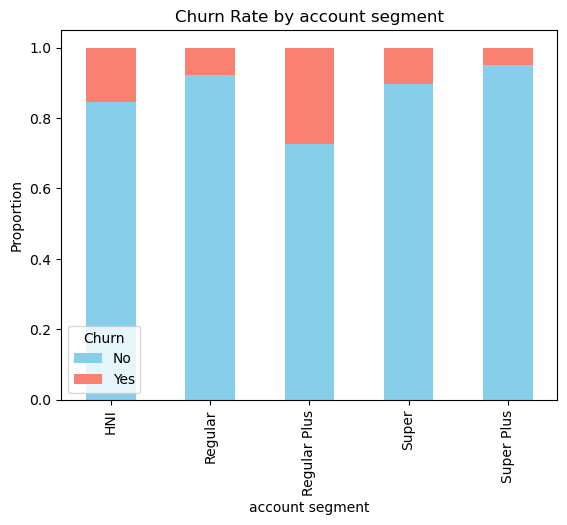

In [42]:
churn_AS = pd.crosstab(df['account_segment'], df['Churn'])
# Normalize to get percentage
churn_AS_norm = churn_AS.div(churn_AS.sum(1), axis=0)
churn_AS_norm.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Churn Rate by account segment')
plt.ylabel('Proportion')
plt.xlabel('account segment')
plt.legend(['No', 'Yes'], title='Churn')
plt.show()

* Churn vs payment

<function matplotlib.pyplot.show(close=None, block=None)>

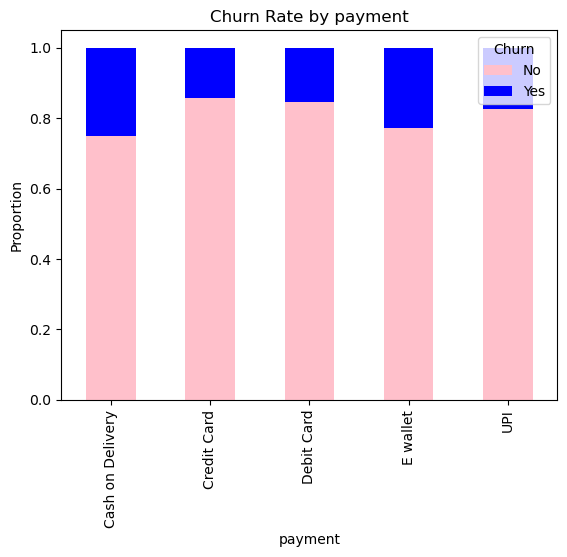

In [43]:
churn_payment= pd.crosstab(df['Payment'], df['Churn'])
# Normalize to get percentage
churn_payment_norm = churn_payment.div(churn_payment.sum(1), axis=0)
churn_payment_norm.plot(kind='bar', stacked=True, color=['pink', 'blue'])
plt.title('Churn Rate by payment')
plt.ylabel('Proportion')
plt.xlabel('payment')
plt.legend(['No', 'Yes'], title='Churn')
plt.show

* Churn vs Marital status

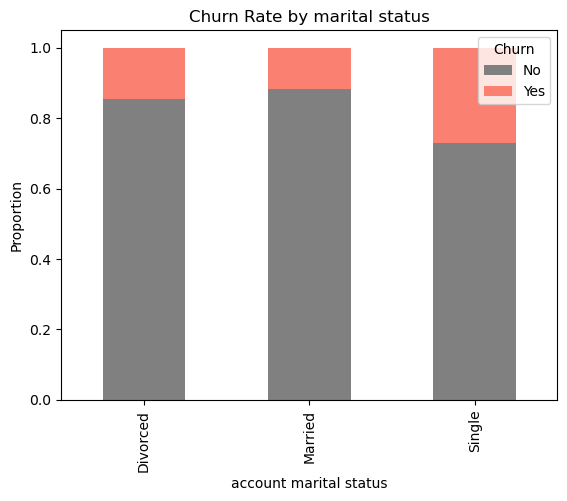

In [44]:
churn_MS = pd.crosstab(df['Marital_Status'], df['Churn'])
# Normalize to get percentage
churn_MS_norm = churn_MS.div(churn_MS.sum(1), axis=0)
churn_MS_norm.plot(kind='bar', stacked=True, color=['gray', 'salmon'])
plt.title('Churn Rate by marital status')
plt.ylabel('Proportion')
plt.xlabel('account marital status')
plt.legend(['No', 'Yes'], title='Churn')
plt.show()

* Churn vs Service Score

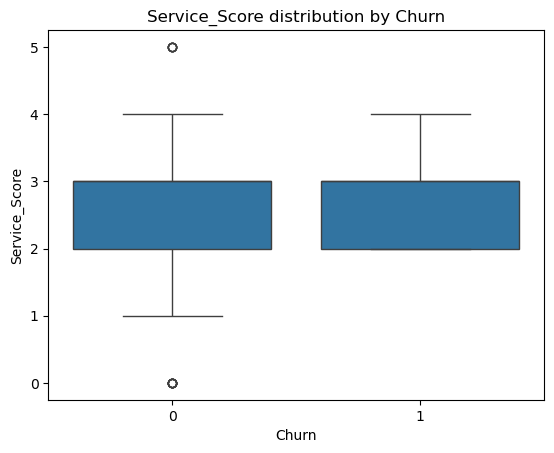

In [45]:
sns.boxplot(data=df, x='Churn', y='Service_Score')
plt.title("Service_Score distribution by Churn")
plt.xlabel("Churn")
plt.ylabel("Service_Score")
plt.show()

* Churn vs CC Agent Score

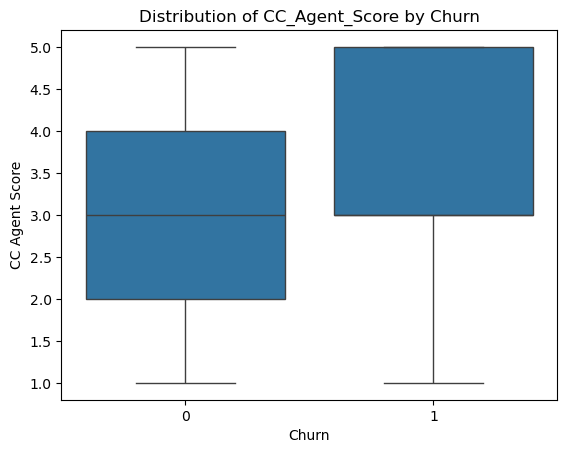

In [46]:
sns.boxplot(data=df, x='Churn', y='CC_Agent_Score')
plt.title("Distribution of CC_Agent_Score by Churn")
plt.xlabel("Churn")
plt.ylabel("CC Agent Score")
plt.show()

* Churn vs Tenure

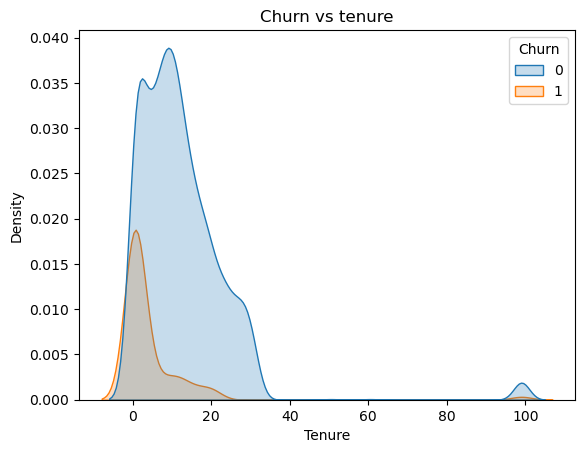

In [47]:
sns.kdeplot(data=df,x='Tenure', hue='Churn',fill=True)
plt.title("Churn vs tenure")
plt.show()

* Churn vs revenue per month

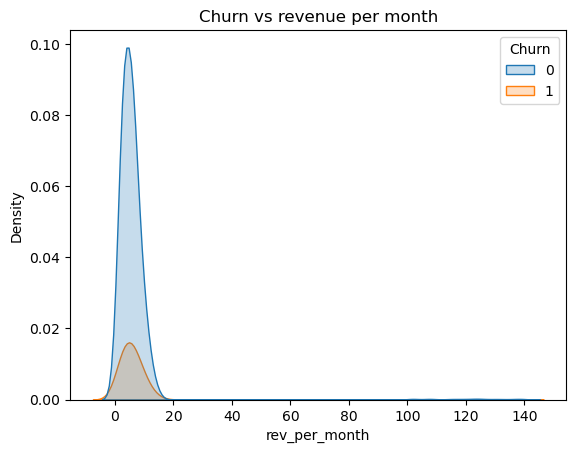

In [48]:
sns.kdeplot(data=df,x='rev_per_month',hue='Churn',fill=True)
plt.title("Churn vs revenue per month")
plt.show()

* Churn vs Complain_ly

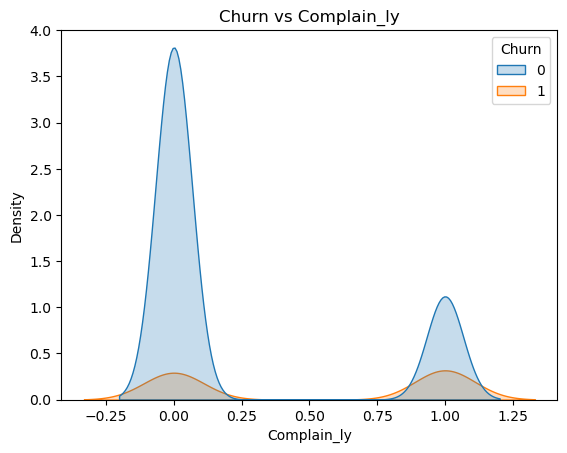

In [49]:
sns.kdeplot(data=df,x='Complain_ly',hue='Churn',fill=True)
plt.title("Churn vs Complain_ly")
plt.show()

* rev_per_month vs cashback

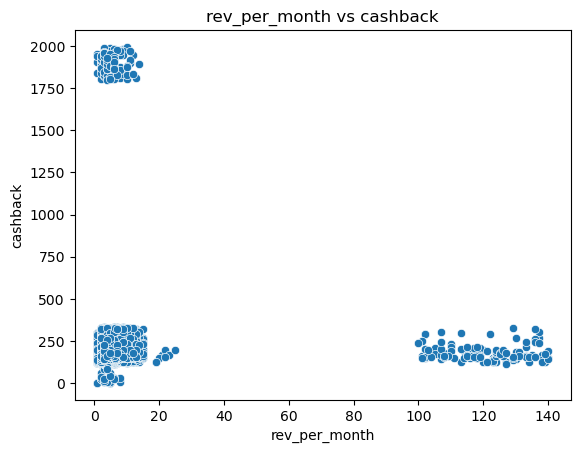

In [50]:
sns.scatterplot(data=df, x='rev_per_month', y='cashback')
plt.title("rev_per_month vs cashback")
plt.show()

* Tenure vs rev_per_month

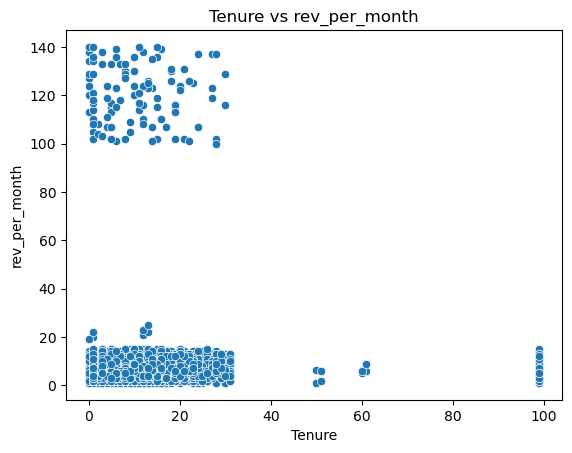

In [51]:
sns.scatterplot(data=df, x='Tenure', y='rev_per_month')
plt.title("Tenure vs rev_per_month")
plt.show()

* CC_Contacted_LY vs Complain_ly

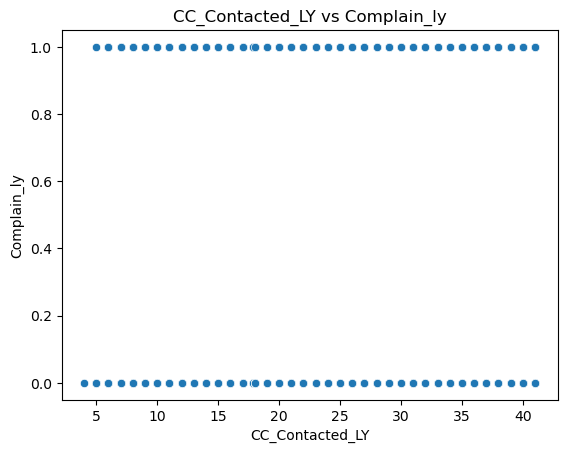

In [52]:
sns.scatterplot(data=df, x='CC_Contacted_LY', y='Complain_ly')
plt.title("CC_Contacted_LY vs Complain_ly")
plt.show()

* Gender vs revenue per month

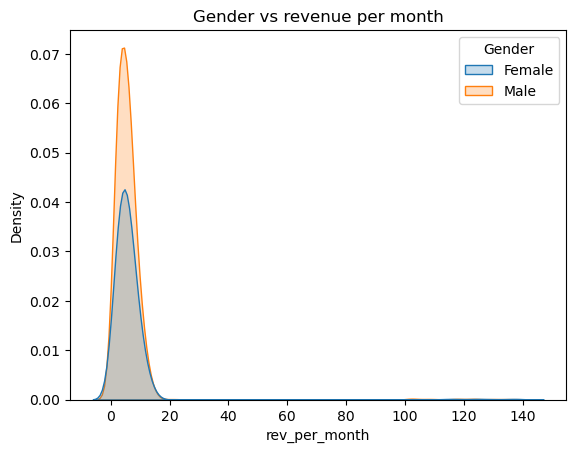

In [53]:
sns.kdeplot(data=df,x='rev_per_month',hue='Gender',fill=True)
plt.title("Gender vs revenue per month")
plt.show()

* cashback by Login_device

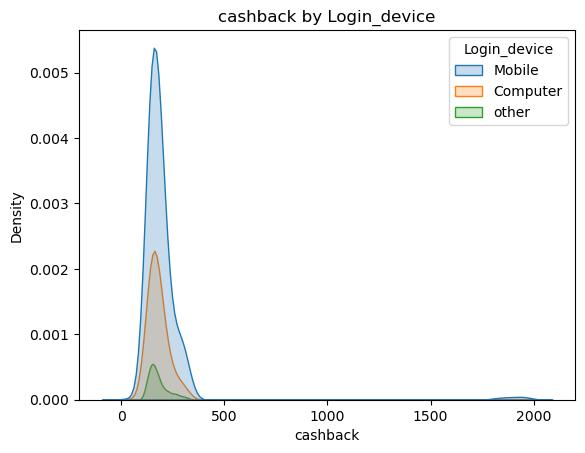

In [54]:
sns.kdeplot(data=df,x='cashback',hue='Login_device',fill=True)
plt.title("cashback by Login_device")
plt.show()

* rev_per_month by account_segment

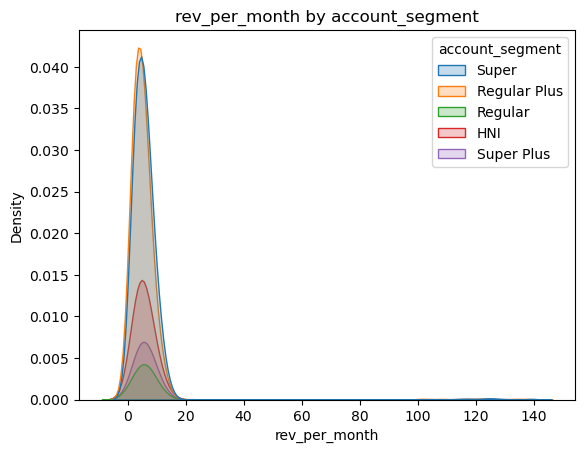

In [55]:
sns.kdeplot(data=df,x='rev_per_month',hue='account_segment',fill=True)
plt.title("rev_per_month by account_segment")
plt.show()

* Tenure by account_segment

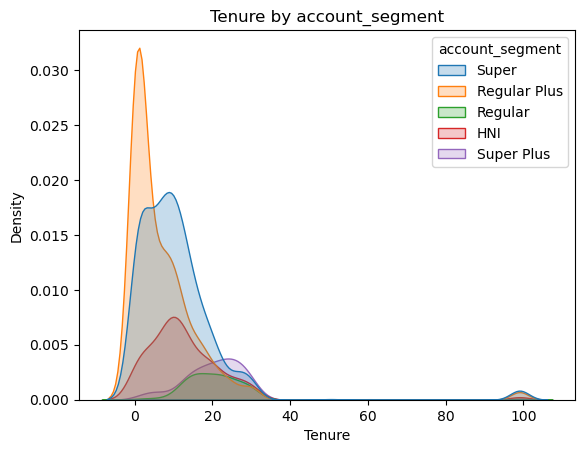

In [56]:
sns.kdeplot(data=df,x='Tenure',hue='account_segment',fill=True)
plt.title("Tenure by account_segment")
plt.show()

* cashback by City_Tier

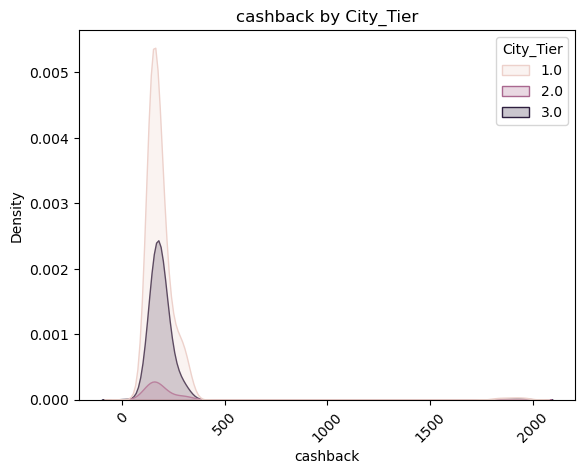

In [57]:
sns.kdeplot(data=df,x='cashback',hue='City_Tier',fill=True)
plt.title("cashback by City_Tier")
plt.xticks(rotation=45)
plt.show()

* rev_per_month by Marital_Status

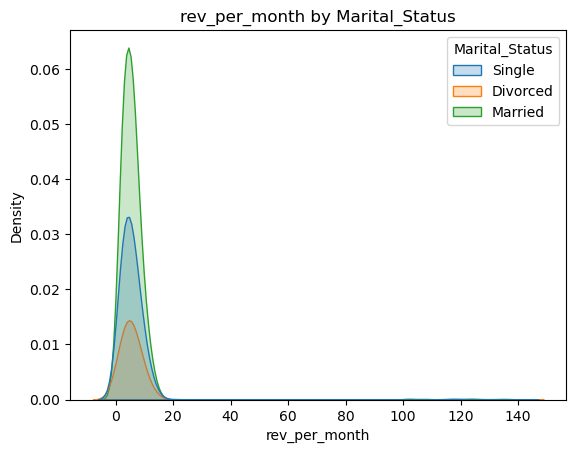

In [58]:
sns.kdeplot(data=df,x='rev_per_month',hue='Marital_Status',fill=True)
plt.title("rev_per_month by Marital_Status")
plt.show()

**Multivariate Analysis**

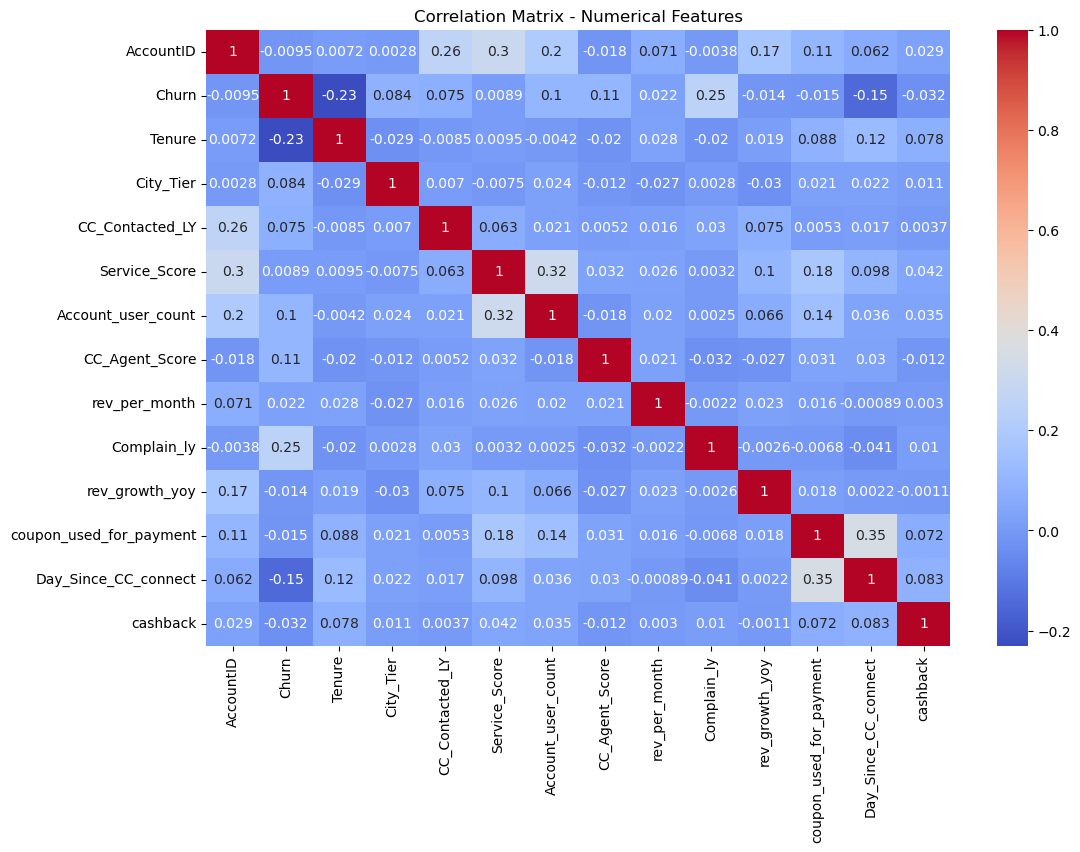

In [59]:
## Heatmap of Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Numerical Features")
plt.show()

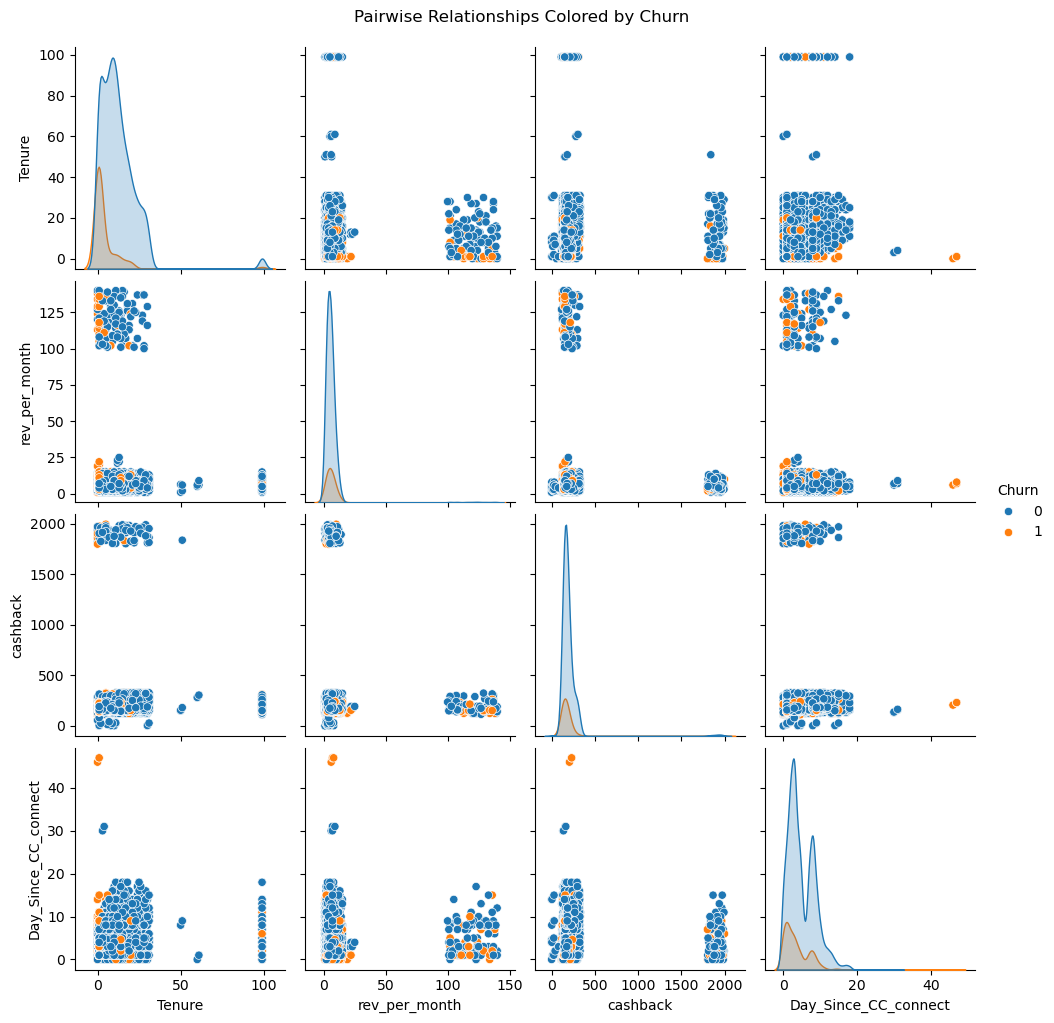

In [60]:
## Pairplot (Numerical Variables by Churn)
sns.pairplot(df, hue='Churn', vars=['Tenure', 'rev_per_month', 'cashback',
'Day_Since_CC_connect'])
plt.suptitle("Pairwise Relationships Colored by Churn", y=1.02)
plt.show()

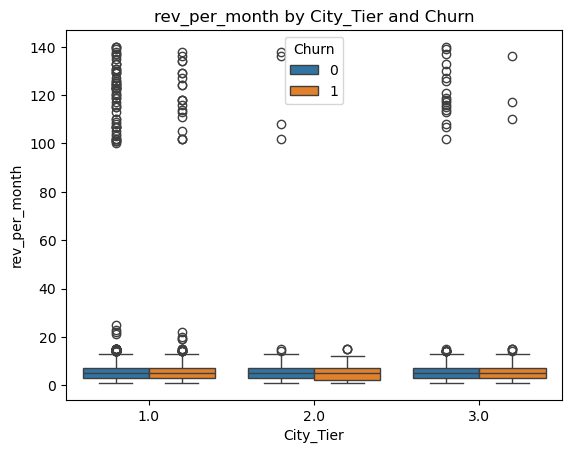

In [61]:
# Boxplot - rev_per_month vs City_Tier & Churn
sns.boxplot(data=df, x='City_Tier', y='rev_per_month', hue='Churn')
plt.title("rev_per_month by City_Tier and Churn")
plt.show()

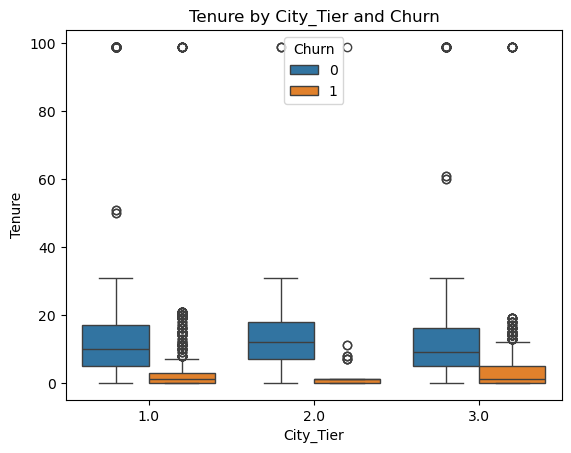

In [62]:
# Boxplot - Tenure vs City_Tier & Churn
sns.boxplot(data=df, x='City_Tier', y='Tenure', hue='Churn')
plt.title("Tenure by City_Tier and Churn")
plt.show()

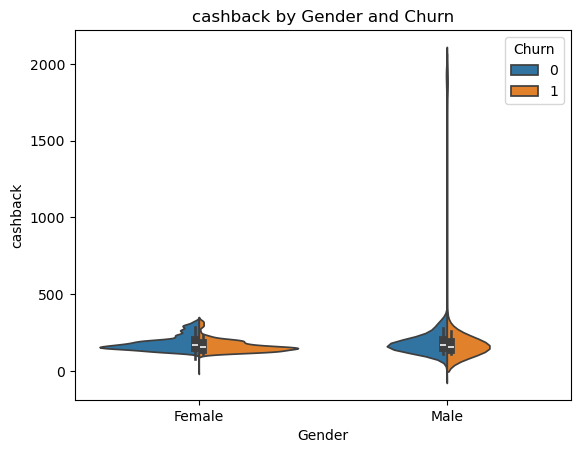

In [63]:
#Violinplot - cashback_l12m vs Gender & Churn
sns.violinplot(data=df, x='Gender', y='cashback', hue='Churn', split=True)
plt.title("cashback by Gender and Churn")
plt.show()



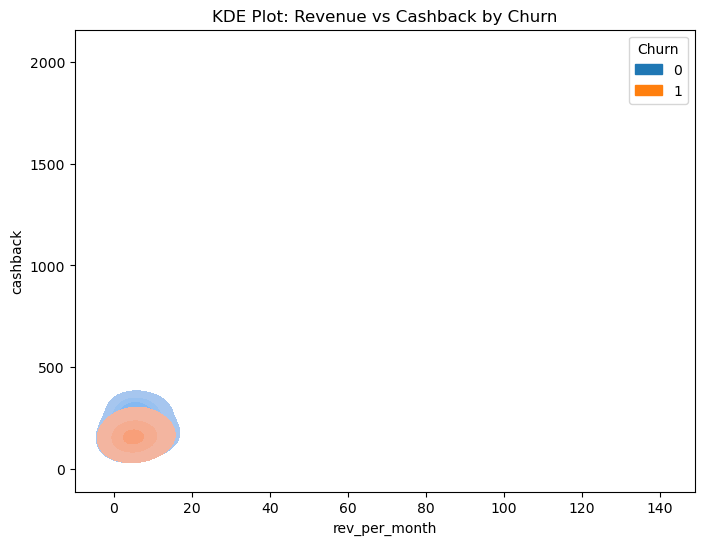

In [64]:
# KDE Plot - rev_per_month vs cashback_l12m by Churn
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='rev_per_month', y='cashback', hue='Churn', fill=True)
plt.title("KDE Plot: Revenue vs Cashback by Churn")
plt.show()

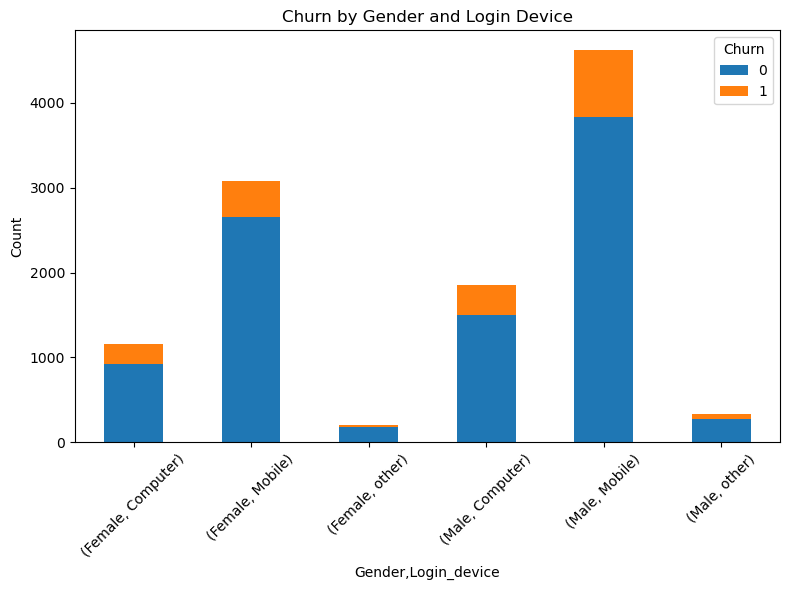

In [68]:
# Grouped Bar Plot - Gender + Login_device vs Churn
grouped = df.groupby(['Gender', 'Login_device', 'Churn']).size().unstack().fillna(0)
grouped.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title("Churn by Gender and Login Device")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



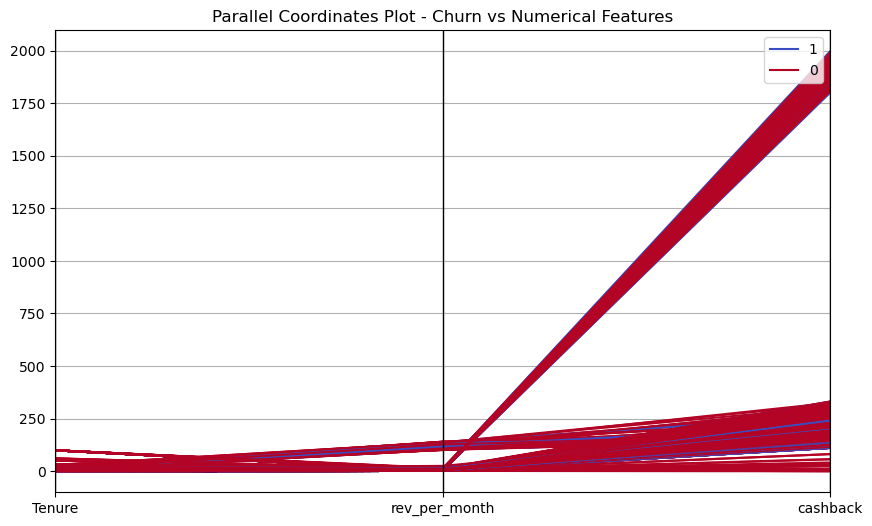

In [69]:
# Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates
df_parallel = df[['Tenure', 'rev_per_month', 'cashback', 'Churn']].copy()
df_parallel['Churn'] = df_parallel['Churn'].astype(str)
plt.figure(figsize=(10, 6))
parallel_coordinates(df_parallel, 'Churn', colormap='coolwarm')
plt.title("Parallel Coordinates Plot - Churn vs Numerical Features")
plt.show()

**Label Encoding**

In [71]:
#Label encoding of all categorical columns
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [72]:
#drop column AccountID
df=df.drop("AccountID",axis=1)

**Splitting data into Train and Test Set** 

In [74]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Training Data: (9008, 17), Testing Data: (2252, 17)


In [77]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,4.0,3.0,6.0,2,0,3.0,3.0,3,2.0,2,9.0,1.0,11.0,1.0,5.0,159.93000,1
1,0.0,1.0,8.0,4,1,3.0,4.0,2,3.0,2,7.0,1.0,15.0,0.0,0.0,120.90000,1
2,0.0,1.0,30.0,2,1,2.0,4.0,2,3.0,2,6.0,1.0,14.0,0.0,3.0,196.23637,1
3,0.0,3.0,15.0,2,1,2.0,4.0,3,5.0,2,8.0,0.0,23.0,0.0,3.0,134.07000,1
4,0.0,1.0,12.0,1,1,2.0,3.0,2,5.0,2,3.0,0.0,11.0,1.0,3.0,129.60000,1


**Feature Scaling**

In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Training the Logistic Regression Model**

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

**Training the Random Forest Model**

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

**Training the XGBoost Model**

In [94]:
!pip install xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

**Model Evaluation**

In [95]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


--- Logistic Regression ---
Accuracy: 0.8903197158081705
Confusion Matrix:
 [[1848   35]
 [ 212  157]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1883
           1       0.82      0.43      0.56       369

    accuracy                           0.89      2252
   macro avg       0.86      0.70      0.75      2252
weighted avg       0.88      0.89      0.88      2252


--- Random Forest ---
Accuracy: 0.9769094138543517
Confusion Matrix:
 [[1876    7]
 [  45  324]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1883
           1       0.98      0.88      0.93       369

    accuracy                           0.98      2252
   macro avg       0.98      0.94      0.96      2252
weighted avg       0.98      0.98      0.98      2252


--- XGBoost ---
Accuracy: 0.9746891651865008
Confusion Matrix:
 [[1870   13]
 [  44  325]]
Clas

AUC Score: 0.9944


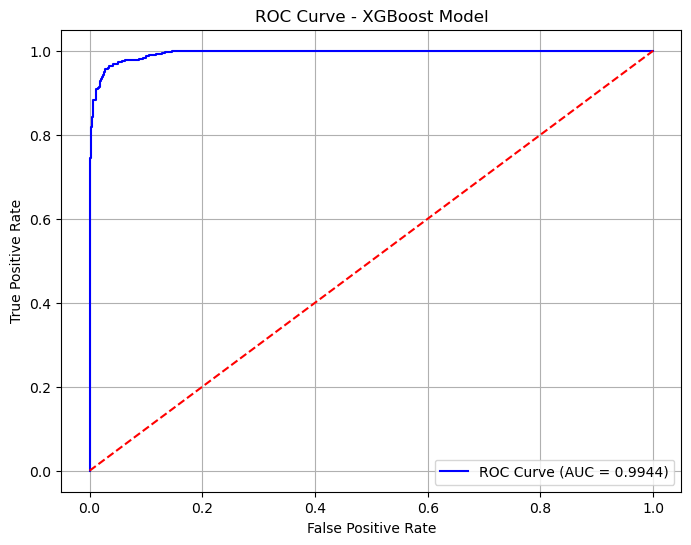

In [96]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
# Get the predicted probabilities (for the positive class)
y_probs = xgb.predict_proba(X_test)[:, 1]
# Calculate false positive rate, true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Calculate AUC score
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.4f}")
# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

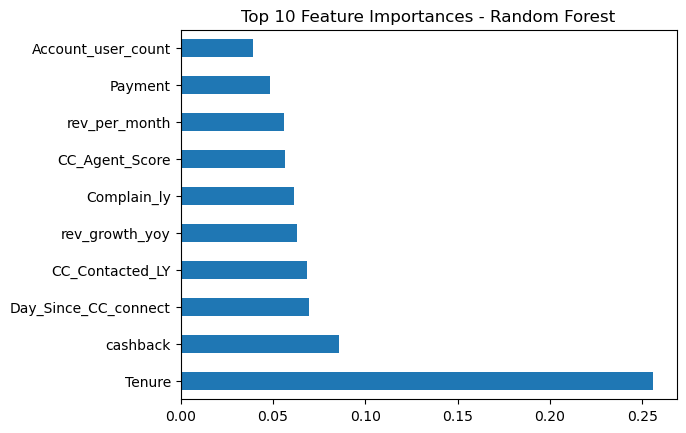

In [93]:
import matplotlib.pyplot as plt
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()